## Job Scam Detector


**Problem Statement**
- Develop a classification system that can analyze job posting data and determine whether a job listing is legitimate or fraudulent with high precision and recall, helping job seekers avoid scams and focus on genuine opportunities.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/data.csv')

In [4]:
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
16411,16412,Manufacturing Engineering Manager,"US, OH, Cincinnati",NaN,NaN,We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,NaN,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
2596,2597,Paralegal,"GB, LND, London",NaN,NaN,"Launched in 2010, Lyst is an innovative way to...",The OpportunityLyst is looking for a bright an...,Excellent attention to detail and organisation...,NaN,0,1,0,Full-time,Entry level,NaN,Apparel & Fashion,NaN,0
16973,16974,"Electricians Needed in El Reno, OK","US, OK, El Reno",NaN,NaN,We bring you strong solutions!With the complex...,"Immediate need for Electricians in El Reno, Ok...",Candidate Requirements7+ years’ experience as ...,NaN,0,1,1,Contract,Associate,Certification,Construction,Project Management,0
2824,2825,Marketing Manager (2X),"US, CA, San Francisco Bay Area",NaN,NaN,"Replise was started in 2008, just a year after...",The Replise marketing team is growing as we ex...,Qualifications:5-8 years of experience working...,"About RepliseAt Replise, we believe in social ...",0,1,0,Full-time,NaN,NaN,Research,Marketing,0
16754,16755,Freelance Interpreters,"GB, CRY, London",Interpreters,NaN,Welcome to Trans4u Ltd.We are an International...,Welcome to Trans4u Ltd | Translation &amp; Int...,1. A minimum of two years of relevant work exp...,NaN,0,1,1,Part-time,Entry level,Bachelor's Degree,Translation and Localization,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df['location'].str.split(',').str[0]

0        US
1        NZ
2        US
3        US
4        US
         ..
17875    CA
17876    US
17877    US
17878    NG
17879    NZ
Name: location, Length: 17880, dtype: object

In [9]:
df['Country'] = df['location'].str.split(',').str[0]

In [10]:
df['Country'].unique()

array(['US', 'NZ', 'DE', 'GB', 'AU', 'SG', 'IL', 'AE', 'CA', 'IN', 'EG',
       'PL', 'GR', nan, 'PK', 'BE', 'BR', 'SA', 'DK', 'RU', 'ZA', 'CY',
       'HK', 'TR', 'IE', 'LT', 'JP', 'NL', 'AT', 'KR', 'FR', 'EE', 'TH',
       'PA', 'KE', 'MU', 'MX', 'RO', 'MY', 'FI', 'CN', 'ES', 'SE', 'CL',
       'UA', 'QA', 'IT', 'LV', 'IQ', 'BG', 'PH', 'CZ', 'VI', 'MT', 'HU',
       'BD', 'KW', 'LU', 'NG', 'RS', 'BY', 'VN', 'ID', 'ZM', 'NO', 'BH',
       'UG', 'CH', 'TT', 'SD', 'SK', 'AR', 'TW', 'PT', 'PE', 'CO', 'IS',
       'SI', 'MA', 'AM', 'TN', 'GH', 'AL', 'HR', 'CM', 'SV', 'NI', 'LK',
       'JM', 'KZ', 'KH'], dtype=object)

In [11]:
df['State'] = df['location'].str.split(',').str[1]

In [12]:
df['City'] = df['location'].str.split(',').str[2]

In [13]:
df.drop(columns=['location'], inplace=True)

In [14]:
df.sample()

,job_id,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,State,City
2511,2512,Product Manager,NaN,NaN,Want to make a difference?Do you know when peo...,You love building things and love UX/wireframi...,Experience of UX / WireframingSome experience ...,We’ll pay you wellWe offer a great options pac...,1,1,1,Full-time,Associate,Unspecified,Internet,Product Management,0,GB,LND,London


In [15]:
df['company_profile'][0]

"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City."

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
categorical = []
numerical = []

for col in df.columns:
    if df[col].dtype != 'object':
        numerical.append(col)
    else:
        categorical.append(col)

In [18]:
print(len(categorical))
print(categorical)

15
['title', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'Country', 'State', 'City']


In [19]:
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [20]:
df[numerical].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df[numerical][df[numerical] == '?'].count()

job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [22]:
df[categorical][df[categorical] == '?'].count()

title                  0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
Country                0
State                  0
City                   0
dtype: int64

<Axes: >

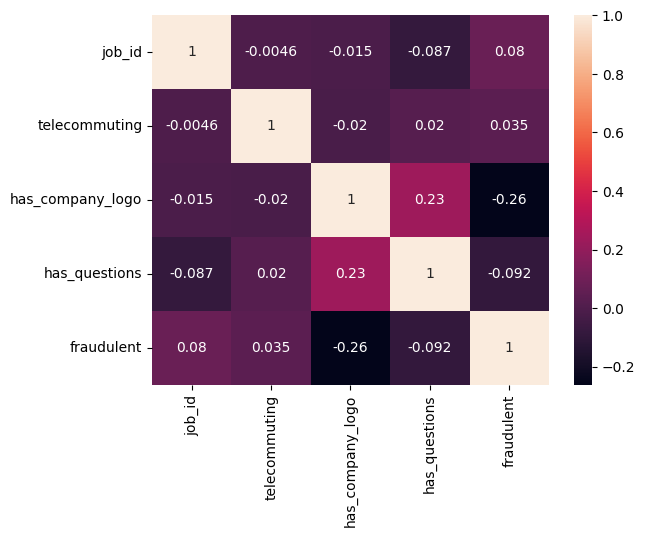

In [23]:
sns.heatmap(df[numerical].corr(), annot=True)

<Axes: xlabel='fraudulent', ylabel='count'>

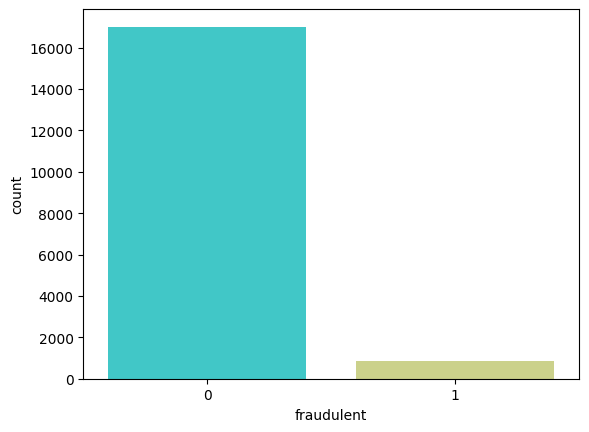

In [26]:
sns.countplot(data=df, x='fraudulent', palette='rainbow')

In [27]:
fake = df[df['fraudulent']==1]
fake.shape

(866, 20)

In [29]:
real = df[df['fraudulent']==0]
real.shape

(17014, 20)

In [31]:
df.shape

(17880, 20)